# CSE 158, Fall 2019: Homework 3

**Name:** CUI, HONGJIAN &ensp;&ensp;&ensp;&ensp; **PID:** U08398995 

## Tasks (Category prediction):

### Question 6:

In [2]:
import matplotlib.pyplot as plt
import json
import numpy as np
import random
import string
from collections import defaultdict
from nltk.stem.porter import PorterStemmer
from sklearn import linear_model

In [3]:
def parseData(fname):
    for l in open(fname):
        yield eval(l)

In [4]:
path = "/home/cui/Projects/PycharmProjects/CSE-158/data/train_Category.json"

In [5]:
dataset = list(parseData(path))

In [6]:
dataset[0]

{'n_votes': 0,
 'review_id': 'r99763621',
 'user_id': 'u17334941',
 'review_text': "Genuinely enthralling. If Collins or Bernard did invent this out of whole cloth, they deserve a medal for imagination. Lets leave the veracity aside for a moment - always a touchy subject when it comes to real life stories of the occult - and talk about the contents. \n The Black Alchemist covers a period of two years in which Collins, a magician, and Bernard, a psychic, undertook a series of psychic quests that put them in opposition with the titular Black Alchemist. As entertainment goes, the combination of harrowing discoveries, ancient lore, and going down the pub for a cigarette and a Guinness, trying to make sense of it all while a hen party screams at each other, is a winner. It is simultaneously down to earth and out of this world. \n It reads fast, both because of the curiousity and because Collins has a very clear writing style. Sometimes its a little clunky or over repetitive and there's a fe

In [7]:
split = 190000

In [8]:
training_set = dataset[:split]
validation_set = dataset[split:]

In [9]:
wordCounts = defaultdict(int)
punctuation = set(string.punctuation)
totalWords = 0
stemmer = PorterStemmer()

In [10]:
for d in training_set:
    text = d['review_text']
    text = text.lower()
    text = [c for c in text if not (c in punctuation)]
    text = ''.join(text)
    words = text.strip().split()
    for word in words:
        w = stemmer.stem(word)
        totalWords += 1
        wordCounts[w] += 1

In [11]:
len(wordCounts)

360391

In [12]:
popularWords = sorted(wordCounts.items(), key=lambda x:x[1])[-1000:]

In [13]:
popularWords.reverse()

In [14]:
[(w[0], round(w[1] / totalWords, 4)) for w in popularWords[:10]]

[('the', 0.0489),
 ('and', 0.0296),
 ('a', 0.026),
 ('to', 0.0247),
 ('i', 0.0241),
 ('of', 0.0214),
 ('it', 0.0166),
 ('is', 0.0145),
 ('in', 0.0141),
 ('thi', 0.0128)]

In [15]:
words = [w[0] for w in popularWords]

In [16]:
wordId = dict(zip(words, range(len(words))))
wordSet = set(words)

### Question 7:

In [17]:
def feature(datum):
    feat = [0] * len(wordSet)
    text = datum['review_text']
    text = text.lower()
    text = [c for c in text if not (c in punctuation)]
    text = ''.join(text)
    
    word = text.strip().split()
    for w in word:
        w = stemmer.stem(w)
        if not (w in wordSet): continue
        feat[wordId[w]] += 1
    feat.append(1)
    
    return feat

In [18]:
X_train = [feature(d) for d in training_set]
X_validation = [feature(d) for d in validation_set]
y_train = [d['genreID'] for d in training_set]
y_validation = [d['genreID'] for d in validation_set]

In [18]:
model = linear_model.LogisticRegression(solver='lbfgs', multi_class='auto')

In [19]:
model.fit(X_train, y_train)

/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
validation_predictions = model.predict(X_validation)
correctPredictionsValidation = validation_predictions == y_validation

In [21]:
sum(correctPredictionsValidation) / len(correctPredictionsValidation)

0.6633

### Question 8:

In [22]:
# dictionary size from 300 to 2400, c from 0.0001 to 100
dic_size = [300 * (n + 1) for n in range(8)]
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
accuracyList = []

In [23]:
for s in dic_size:
    print("Dictionary size: " + str(s))
    
    for c in C:
        print("C = " + str(c))
        
        popularWords = sorted(wordCounts.items(), key=lambda x:x[1])[-s:]
        popularWords.reverse()
        words = [w[0] for w in popularWords]
        wordId = dict(zip(words, range(len(words))))
        wordSet = set(words)
    
        X_train = [feature(d) for d in training_set]
        X_validation = [feature(d) for d in validation_set]
    
        model = linear_model.LogisticRegression(solver='lbfgs', C=c, multi_class='auto')
        model.fit(X_train, y_train)
        validation_predictions = model.predict(X_validation)
        correctPredictionsValidation = validation_predictions == y_validation
        accuracy = sum(correctPredictionsValidation) / len(correctPredictionsValidation)
    
        accuracyList.append([s, c, accuracy])

Dictionary size: 300
C = 0.0001


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 0.001


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 0.01


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 0.1


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 1


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 10


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 100


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Dictionary size: 600
C = 0.0001


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 0.001


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 0.01


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 0.1


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 1


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 10


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 100


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Dictionary size: 900
C = 0.0001


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 0.001


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 0.01


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 0.1


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 1


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 10


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 100


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Dictionary size: 1200
C = 0.0001


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 0.001


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 0.01


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 0.1


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 1


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 10


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 100


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Dictionary size: 1500
C = 0.0001


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 0.001


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 0.01


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 0.1


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 1


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 10


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 100


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Dictionary size: 1800
C = 0.0001


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 0.001


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 0.01


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 0.1


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 1


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 10


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 100


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Dictionary size: 2100
C = 0.0001


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 0.001


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 0.01


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 0.1


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 1


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 10


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 100


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Dictionary size: 2400
C = 0.0001


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 0.001


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 0.01


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 0.1


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 1


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 10


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 100


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Dictionary size: 2700
C = 0.0001


/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C = 0.001


MemoryError: Unable to allocate array with shape (190000, 2701) and data type float64

In [52]:
def draw(acc_list, dic_size):
    plt.figure(figsize=(15,8))
    
    y_plt = [d[2] for d in acc_list if d[0] == dic_size]
    
    x_axis = [100 / len(C) * C.index(x) for x in C]

    plt.plot(x_axis, y_plt)
    
    plt.xticks(x_axis, [str(c) for c in C])
    y_max = max(y_plt)
    x_max = x_axis[y_plt.index(y_max)]
    plt.text(x_max, y_max, [C[y_plt.index(y_max)], y_max],ha='center', va='bottom', fontsize=15)

    plt.title("The accuracy of different C with dictionary size = " + str(dic_size))
    plt.xlabel("C")
    plt.ylabel("Accuracy")
    plt.show()

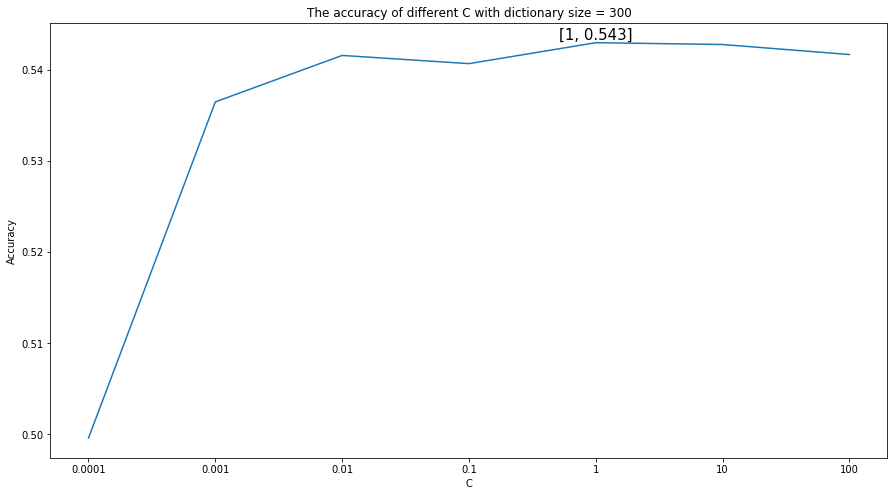

In [53]:
draw(accuracyList, 300)

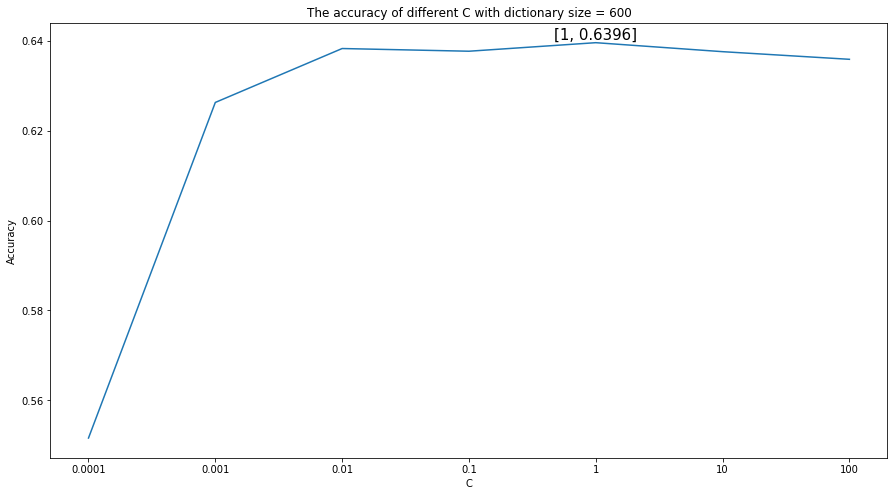

In [54]:
draw(accuracyList, 600)

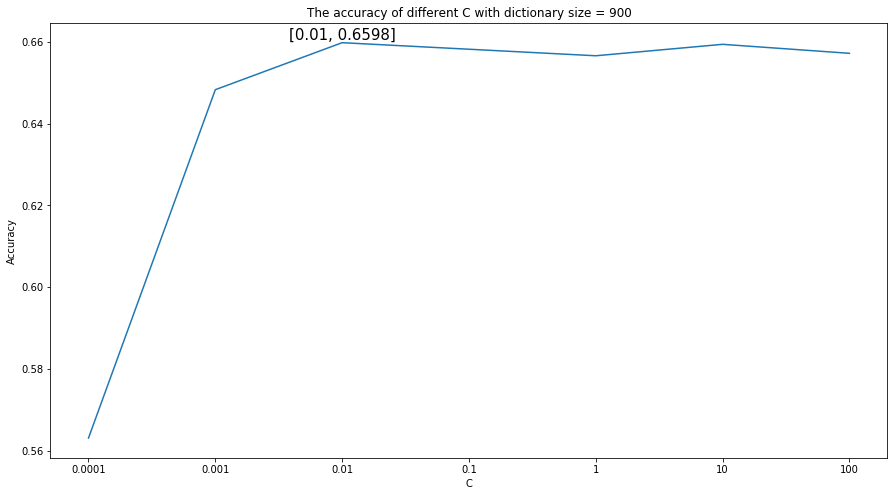

In [55]:
draw(accuracyList, 900)

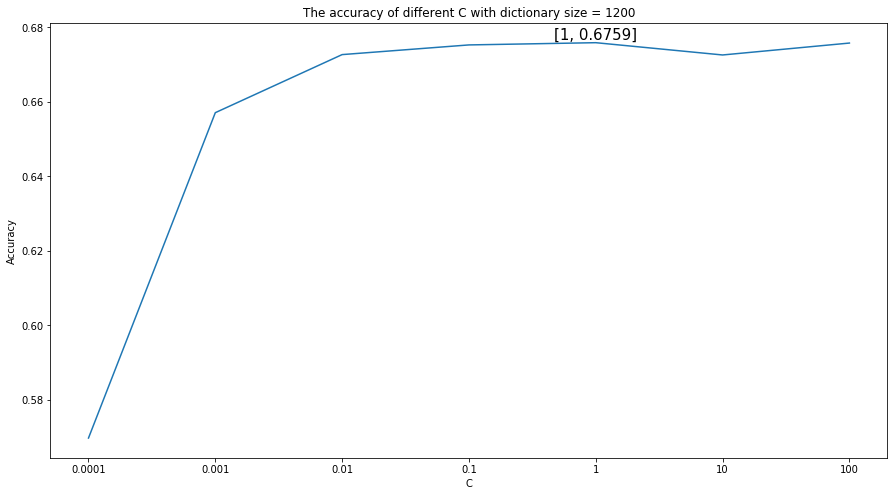

In [56]:
draw(accuracyList, 1200)

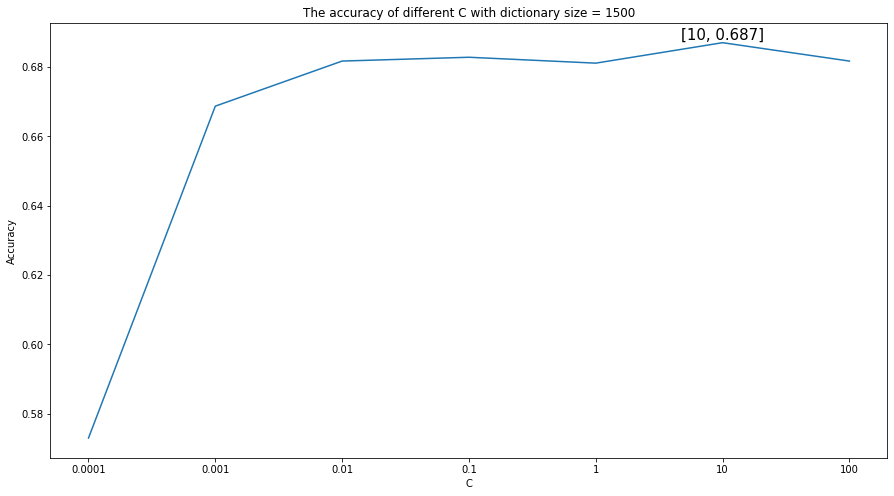

In [57]:
draw(accuracyList, 1500)

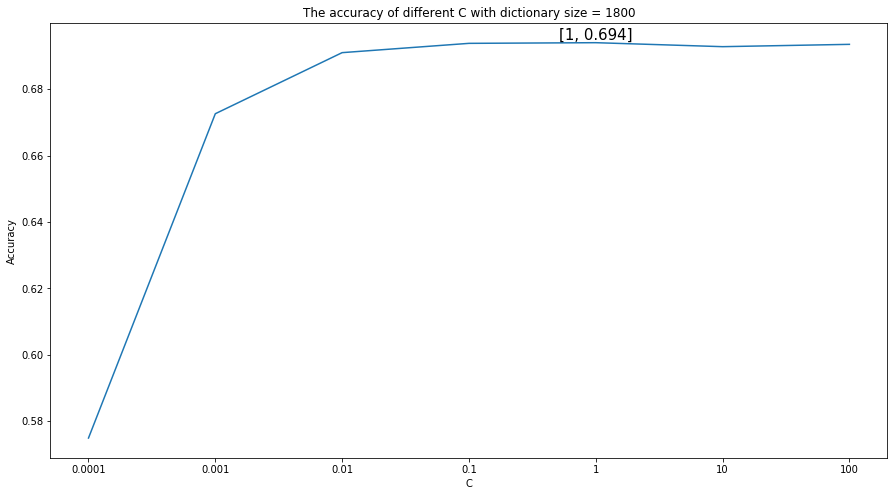

In [58]:
draw(accuracyList, 1800)

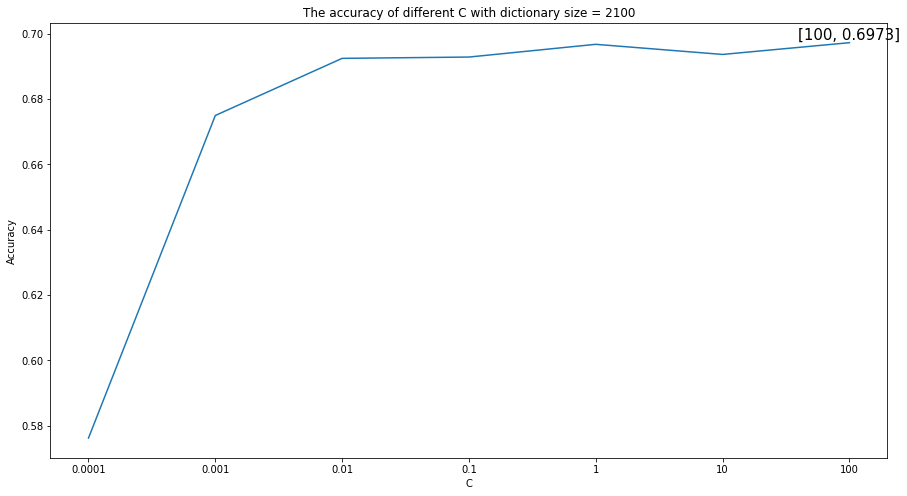

In [59]:
draw(accuracyList, 2100)

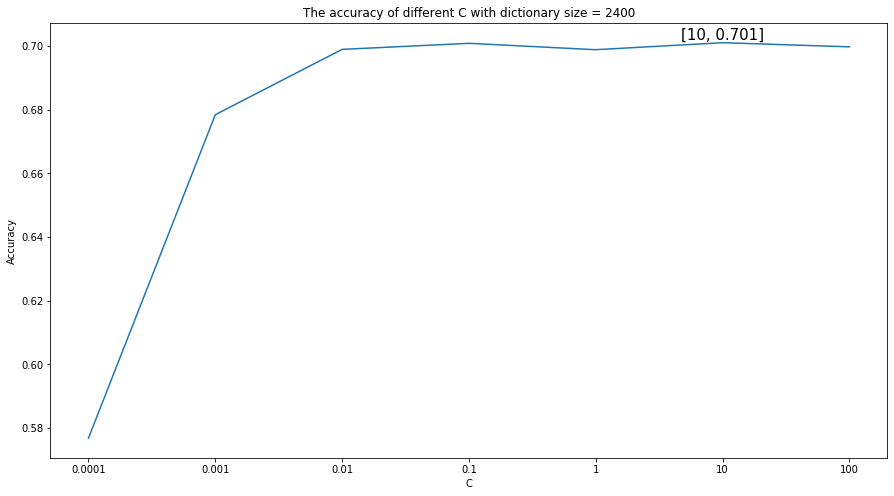

In [60]:
draw(accuracyList, 2400)

Images as shown above, we can find that when the dictionary size = 2400 and C = 10, the accuracy is the highest.

In [19]:
popularWords = sorted(wordCounts.items(), key=lambda x:x[1])[-2400:]
popularWords.reverse()
words = [w[0] for w in popularWords]
wordId = dict(zip(words, range(len(words))))
wordSet = set(words)
    
X_train = [feature(d) for d in training_set]
X_validation = [feature(d) for d in validation_set]
    
model = linear_model.LogisticRegression(solver='lbfgs', C=10, multi_class='auto')
model.fit(X_train, y_train)

/home/cui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
dataset_test = list(parseData("/home/cui/Projects/PycharmProjects/CSE-158/data/test_Category.json"))

In [56]:
predictions = open("/home/cui/Projects/PycharmProjects/CSE-158/data/predictions_Category.txt", 'w')
predictions.write("userID-reviewID,prediction\n")

for l in dataset_test:
    cat = model.predict([feature(l)])
    predictions.write(l['user_id'] + '-' + l['review_id'] + "," + str(cat[0]) + "\n")

predictions.close()